In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = r"C:\Users\sanoj\Desktop\Data Science\Datasets\Sustainable fashion\sustainable_fashion_trends_2024.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [4]:
data.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [5]:
data.isnull().sum()

Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64

In [6]:
# Value counts for categorical variables
print(data['Country'].value_counts())
print(data['Material_Type'].value_counts())
print(data['Sustainability_Rating'].value_counts())


Country
UK           515
Germany      507
Italy        506
USA          505
India        503
China        502
Brazil       500
Australia    499
France       497
Japan        466
Name: count, dtype: int64
Material_Type
Recycled Polyester    867
Hemp                  844
Vegan Leather         833
Bamboo Fabric         820
Tencel                819
Organic Cotton        817
Name: count, dtype: int64
Sustainability_Rating
B    1278
D    1249
C    1242
A    1231
Name: count, dtype: int64


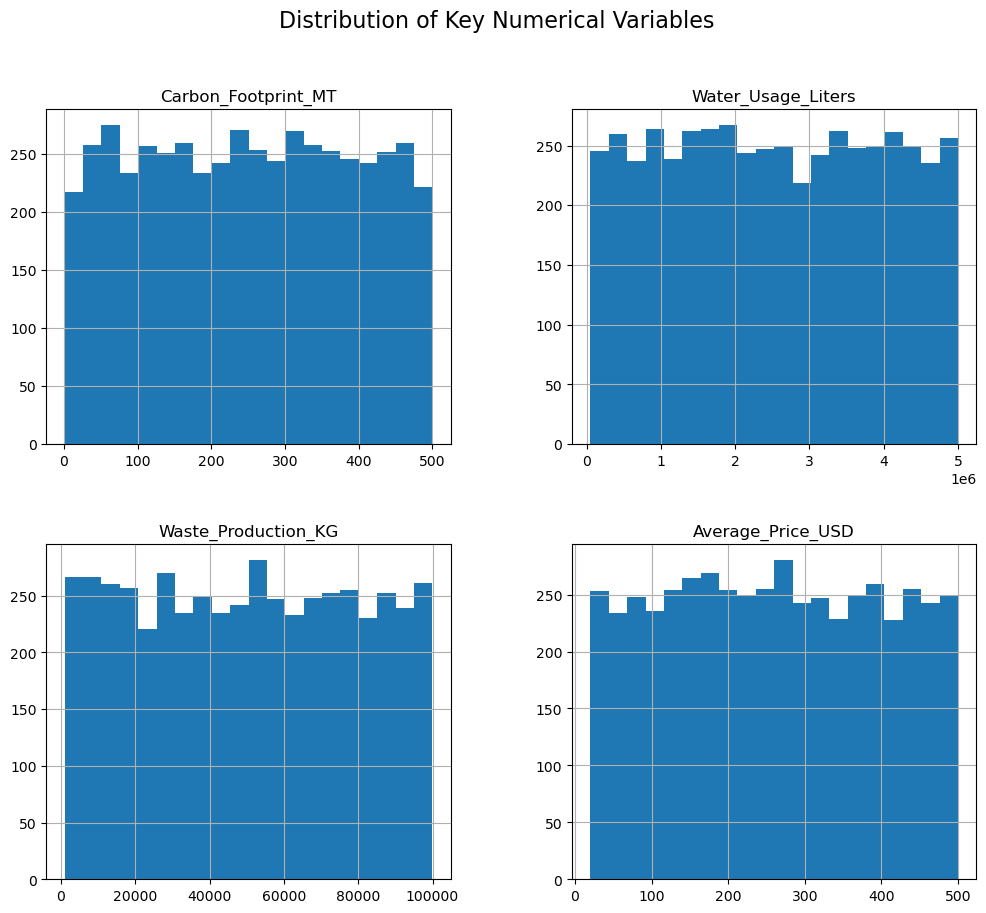

In [7]:
# Plotting histograms for numerical variables
numerical_columns = ['Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Average_Price_USD']

data[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Key Numerical Variables", fontsize=16)
plt.show()


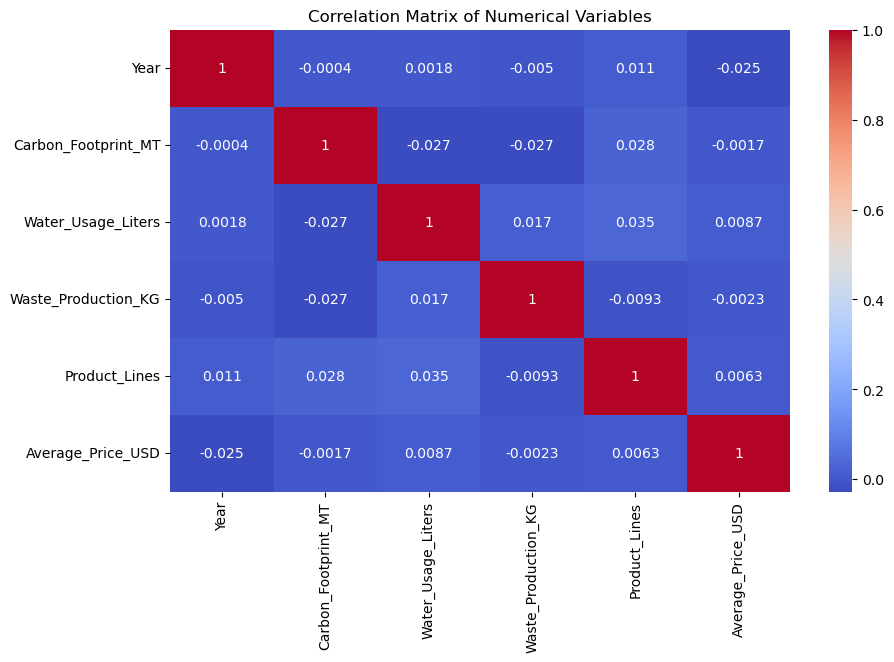

In [8]:
# Select only numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numerical columns
corr_matrix = numeric_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


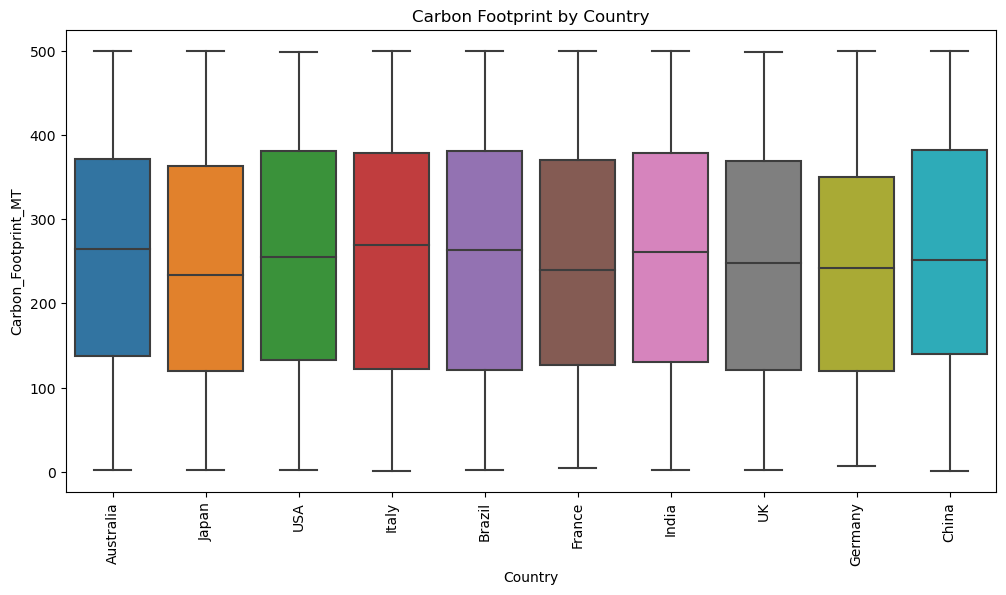

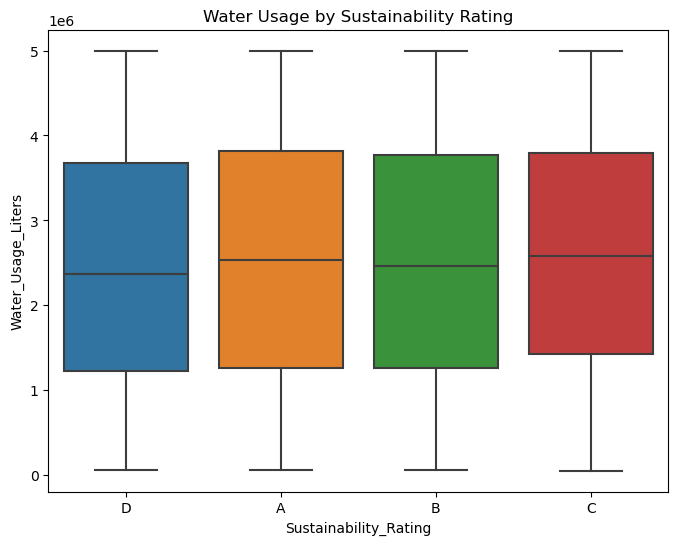

In [9]:
# Boxplot: Carbon Footprint by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Carbon_Footprint_MT', data=data)
plt.title('Carbon Footprint by Country')
plt.xticks(rotation=90)
plt.show()

# Boxplot: Water Usage by Sustainability Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sustainability_Rating', y='Water_Usage_Liters', data=data)
plt.title('Water Usage by Sustainability Rating')
plt.show()


In [10]:
from scipy import stats

# Perform ANOVA for water usage by sustainability rating
anova_result = stats.f_oneway(
    data[data['Sustainability_Rating'] == 'A']['Water_Usage_Liters'],
    data[data['Sustainability_Rating'] == 'B']['Water_Usage_Liters'],
    data[data['Sustainability_Rating'] == 'C']['Water_Usage_Liters'],
    data[data['Sustainability_Rating'] == 'D']['Water_Usage_Liters']
)

print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA F-statistic: 1.8322100543566342
P-value: 0.138988429303272


In [11]:
from scipy import stats

# Perform ANOVA for carbon footprint by country
anova_result = stats.f_oneway(
    data[data['Country'] == 'Australia']['Carbon_Footprint_MT'],
    data[data['Country'] == 'Japan']['Carbon_Footprint_MT'],
    data[data['Country'] == 'USA']['Carbon_Footprint_MT'],
    data[data['Country'] == 'Italy']['Carbon_Footprint_MT'],
    data[data['Country'] == 'Brazil']['Carbon_Footprint_MT'],
    data[data['Country'] == 'France']['Carbon_Footprint_MT'],
    data[data['Country'] == 'India']['Carbon_Footprint_MT'],
    data[data['Country'] == 'UK']['Carbon_Footprint_MT'],
    data[data['Country'] == 'Germany']['Carbon_Footprint_MT'],
    data[data['Country'] == 'China']['Carbon_Footprint_MT']
)

# Output the results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA F-statistic: 0.68394253730877
P-value: 0.7242090252005906


In [12]:
# Perform ANOVA for waste production by sustainability rating
anova_result_waste = stats.f_oneway(
    data[data['Sustainability_Rating'] == 'A']['Waste_Production_KG'],
    data[data['Sustainability_Rating'] == 'B']['Waste_Production_KG'],
    data[data['Sustainability_Rating'] == 'C']['Waste_Production_KG'],
    data[data['Sustainability_Rating'] == 'D']['Waste_Production_KG']
)

# Output the results
print(f"ANOVA F-statistic (Waste Production): {anova_result_waste.statistic}")
print(f"P-value (Waste Production): {anova_result_waste.pvalue}")


ANOVA F-statistic (Waste Production): 1.8365826370253813
P-value (Waste Production): 0.13820485460882115


In [13]:
# Split data into two groups: with and without recycling programs
with_recycling = data[data['Recycling_Programs'] == 'Yes']['Carbon_Footprint_MT']
without_recycling = data[data['Recycling_Programs'] == 'No']['Carbon_Footprint_MT']

# Perform independent t-test
t_stat_recycling, p_value_recycling = stats.ttest_ind(with_recycling, without_recycling, nan_policy='omit')

print(f"T-statistic (Recycling Program): {t_stat_recycling}")
print(f"P-value (Recycling Program): {p_value_recycling}")


T-statistic (Recycling Program): -2.5172551113262753
P-value (Recycling Program): 0.011858343829241811


In [14]:
# Calculate Pearson correlation coefficient between waste production and water usage
corr_waste_water, p_value_waste_water = stats.pearsonr(data['Waste_Production_KG'], data['Water_Usage_Liters'])

print(f"Pearson Correlation Coefficient (Waste vs. Water): {corr_waste_water}")
print(f"P-value (Waste vs. Water): {p_value_waste_water}")


Pearson Correlation Coefficient (Waste vs. Water): 0.016613536786865904
P-value (Waste vs. Water): 0.2401780858725753


In [15]:
import scipy.stats as stats

# Assuming 'data' is your dataframe containing product prices and sustainability ratings
anova_price = stats.f_oneway(
    data[data['Sustainability_Rating'] == 'A']['Average_Price_USD'],
    data[data['Sustainability_Rating'] == 'B']['Average_Price_USD'],
    data[data['Sustainability_Rating'] == 'C']['Average_Price_USD'],
    data[data['Sustainability_Rating'] == 'D']['Average_Price_USD']
)

print(f"ANOVA F-statistic: {anova_price.statistic}")
print(f"P-value: {anova_price.pvalue}")


ANOVA F-statistic: 0.497135516527255
P-value: 0.684272061227891


In [16]:
# Sustanability by carbon footprint
# Group data by sustainability ratings
group_A = data[data['Sustainability_Rating'] == 'A']['Carbon_Footprint_MT']
group_B = data[data['Sustainability_Rating'] == 'B']['Carbon_Footprint_MT']
group_C = data[data['Sustainability_Rating'] == 'C']['Carbon_Footprint_MT']
group_D = data[data['Sustainability_Rating'] == 'D']['Carbon_Footprint_MT']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C, group_D)

# Print the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA F-statistic: 0.3046983984690649
P-value: 0.8220231542455783


In [17]:
# Group data by 'Material_Type'
material_groups = [group["Average_Price_USD"].values for name, group in data.groupby("Material_Type")]

# Perform ANOVA test
anova_result = stats.f_oneway(*material_groups)

# Display the F-statistic and p-value
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA F-statistic: 0.24444382228618292
P-value: 0.9427068532161722


In [23]:
# Create the 'Recycling_Impact' field
data['Recycling_Impact'] = data.apply(lambda row: row['Carbon_Footprint_MT'] if row['Recycling_Programs'] == 'Yes' else None, axis=1)

import scipy.stats as stats

# Filter data to include only rows with Recycling Programs = 'Yes'
recycling_data = data[data['Recycling_Programs'] == 'Yes']

# Perform ANOVA on the recycling impact across material types and countries
anova_result = stats.f_oneway(
    recycling_data[recycling_data['Material_Type'] == 'Bamboo Fabric']['Recycling_Impact'],
    recycling_data[recycling_data['Material_Type'] == 'Hemp']['Recycling_Impact'],
    recycling_data[recycling_data['Material_Type'] == 'Organic Cotton']['Recycling_Impact'],
    recycling_data[recycling_data['Material_Type'] == 'Recycled Polyester']['Recycling_Impact'],
    recycling_data[recycling_data['Material_Type'] == 'Tencel']['Recycling_Impact'],
    recycling_data[recycling_data['Material_Type'] == 'Vegan Leather']['Recycling_Impact']
)

# Output the ANOVA results
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


ANOVA F-statistic: 1.3269723422311046
P-value: 0.24963611611816094


In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset (assumed as 'data' from your dashboard)
# Perform a two-way ANOVA with interaction between Material_Type, Country, and Recycling_Programs

model = ols('Waste_Production_KG ~ C(Material_Type) * C(Country) * C(Recycling_Programs)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                                         sum_sq      df  \
C(Material_Type)                                   1.974265e+09     5.0   
C(Country)                                         8.621516e+09     9.0   
C(Recycling_Programs)                              4.117234e+08     1.0   
C(Material_Type):C(Country)                        4.033101e+10    45.0   
C(Material_Type):C(Recycling_Programs)             2.913560e+09     5.0   
C(Country):C(Recycling_Programs)                   9.015894e+09     9.0   
C(Material_Type):C(Country):C(Recycling_Programs)  4.381878e+10    45.0   
Residual                                           4.023664e+12  4880.0   

                                                          F    PR(>F)  
C(Material_Type)                                   0.478887  0.792280  
C(Country)                                         1.161821  0.315094  
C(Recycling_Programs)                              0.499348  0.479820  
C(Material_Type):C(Country)         

In [21]:
from statsmodels.formula.api import ols

# Load the dataset (assumed as 'data' from your dashboard)
# Perform a two-way ANOVA with interaction between Material_Type, Country, and Recycling_Programs

model = ols('Water_Usage_Liters ~ C(Material_Type) * C(Country) * C(Recycling_Programs)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                                         sum_sq      df  \
C(Material_Type)                                   1.126085e+13     5.0   
C(Country)                                         1.379267e+13     9.0   
C(Recycling_Programs)                              2.694431e+11     1.0   
C(Material_Type):C(Country)                        1.034192e+14    45.0   
C(Material_Type):C(Recycling_Programs)             1.012985e+13     5.0   
C(Country):C(Recycling_Programs)                   2.112118e+13     9.0   
C(Material_Type):C(Country):C(Recycling_Programs)  9.713556e+13    45.0   
Residual                                           9.949046e+15  4880.0   

                                                          F    PR(>F)  
C(Material_Type)                                   1.104688  0.355538  
C(Country)                                         0.751699  0.661524  
C(Recycling_Programs)                              0.132162  0.716217  
C(Material_Type):C(Country)         